Entrene 1000 instancias de de regresión lineal donde los datos para cada una de las instancias están definidos por:
$$
x = 2 * np.random.rand(100,1)
$$
$$
y = 4 + 3 * x + np.random.rand(100,1)
$$
De los estimados obtenidos para los parámetros de cada instancia de regresión, calcule el promedio y la desviación estándar, además grafique sus datos en un histograma y un diagrama de cajas.
Discuta sus resultados: el valor del promedio y la desviación estándar, la forma de la distribución resultante...

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

### Comencemos considerando un único caso

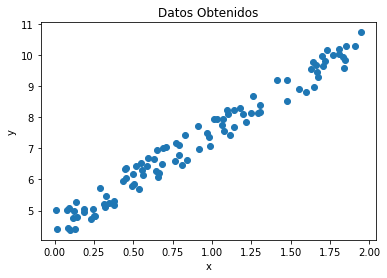

In [13]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
plt.plot(x,y,'o');
plt.title("Datos Obtenidos");
plt.xlabel("x");
plt.ylabel("y");

## Procediendo con la ecuación normal

In [14]:
X_b1=np.concatenate((np.ones((100,1)),x),1)
print(X_b1)

[[1.         0.82957307]
 [1.         1.90781392]
 [1.         0.13617458]
 [1.         0.7940869 ]
 [1.         1.0104428 ]
 [1.         0.44806617]
 [1.         1.30736503]
 [1.         0.56466471]
 [1.         0.53781033]
 [1.         0.37778136]
 [1.         0.01796255]
 [1.         0.50615977]
 [1.         1.84683043]
 [1.         0.14313557]
 [1.         0.18603523]
 [1.         0.18801697]
 [1.         0.09341291]
 [1.         0.55266315]
 [1.         0.12665961]
 [1.         0.45495871]
 [1.         0.24382489]
 [1.         1.83707732]
 [1.         0.76483438]
 [1.         0.59598157]
 [1.         1.21709641]
 [1.         1.07251861]
 [1.         1.65982244]
 [1.         0.63202159]
 [1.         1.73342267]
 [1.         1.70370743]
 [1.         0.58818069]
 [1.         0.37838764]
 [1.         0.09782301]
 [1.         0.66204398]
 [1.         0.25473446]
 [1.         0.13059851]
 [1.         1.66519132]
 [1.         0.43573114]
 [1.         1.62889128]
 [1.         1.30828605]


In [16]:
beta=np.dot(np.linalg.inv(np.dot(X_b1.T,X_b1)),np.dot(X_b1.T,y))
print(beta)

[[4.46644511]
 [3.05317127]]


In [18]:
beta[0][0] #Intercepto

4.466445111452023

In [17]:
beta[1][0] #Pendiente

3.0531712706605005

## Procediendo con el modulo LinearRegression de Scklearn

In [20]:
Lin_Reg=LinearRegression()
Lin_Reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
Lin_Reg.score(x,y)

0.969105132408313

In [24]:
Lin_Reg.coef_

array([[3.05317127]])

In [25]:
Lin_Reg.intercept_

array([4.46644511])

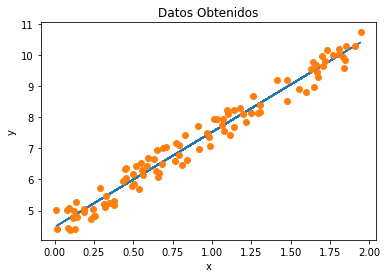

In [27]:
y_pred=beta[0][0]+beta[1][0]*x
plt.plot(x,y_pred)
plt.plot(x,y,'o')
plt.title("Datos Obtenidos");
plt.xlabel("x");
plt.ylabel("y");

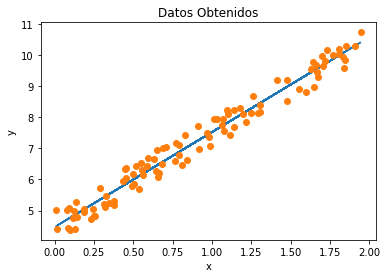

In [32]:
y_pred1=Lin_Reg.intercept_[0]+Lin_Reg.coef_[0]*x
plt.plot(x,y_pred1)
plt.plot(x,y,'o')
plt.title("Datos Obtenidos");
plt.xlabel("x");
plt.ylabel("y");

### Una vez considerado un único caso, realizemos un conjunto de 1000 instancias de regresión lineal

In [80]:
coefficent=[]
intercept=[]
i=0
while i<1000:
  x = 2 * np.random.rand(100,1)
  y = 4 + 3 * x + np.random.rand(100,1)
  Lin_Reg=LinearRegression()
  Lin_Reg.fit(x,y)
  coefficent.append(Lin_Reg.coef_[0])
  intercept.append(Lin_Reg.intercept_)
  i=i+1

### promedio pendiente

In [44]:
np.mean(coefficent)

3.00012937103534

### promedio intercepto

In [45]:
np.mean(intercept)

4.500485345012816

### desviación estandar pendiente

In [100]:
np.std(coefficent)

0.05115854932629837

### desviación estandar intercepto

In [101]:
np.std(intercept)

0.05919315745584292

### Hemos obtenido un valor promedio para la pendiente de 3.0001 con una desviación estandar de 0.0511. El valor promedio para el intercepto es de 4.5005 con una desvaición estandar de 0.0592. En ambos casos la desvaición estandar es pequeña, lo que indica que tanto el intercepto como la pendiente tienden a estar agrupados cerca de su media. Esta poca aleatoriedad es debida a la baja perturbación generada desde la aleatoriedad. El error relativo del intercepto es 0.004%, y para la pendiente es de 12.5%, ambos calculados con respecto a sus promedios.


In [83]:
np.concatenate((coefficent,intercept),1)

array([[3.00011491, 4.5279452 ],
       [3.05793303, 4.45448008],
       [2.93045116, 4.58277998],
       ...,
       [2.96159413, 4.54012299],
       [3.11203104, 4.38782471],
       [3.0015033 , 4.5117646 ]])

In [89]:
df=pd.DataFrame(np.concatenate((coefficent,intercept),1),columns=["coeff","inter"])

In [90]:
df

,coeff,inter
0,3.000115,4.527945
1,3.057933,4.454480
2,2.930451,4.582780
3,3.002301,4.464835
4,2.889863,4.603314
...,...,...
995,3.015668,4.477774
996,2.984667,4.524752
997,2.961594,4.540123
998,3.112031,4.387825


### Histograma

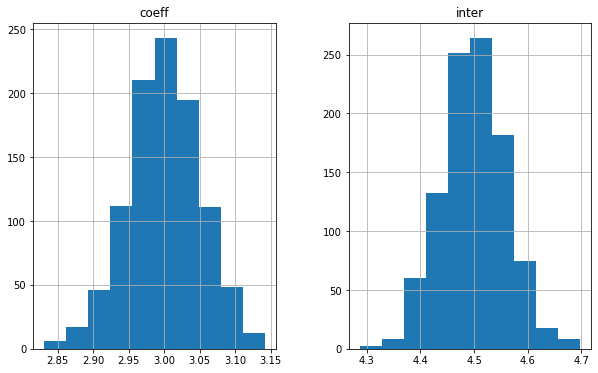

In [97]:
df.hist(figsize=(10,6));

### El histograma tanto de pendiente como de intercepto siguen una forma propia de la distribución normal o gaussiana, en la cual coincide la media con el promedio, lo cual es una caracteristica proporcionada por el ruido introducido.

### Diagrama de cajas

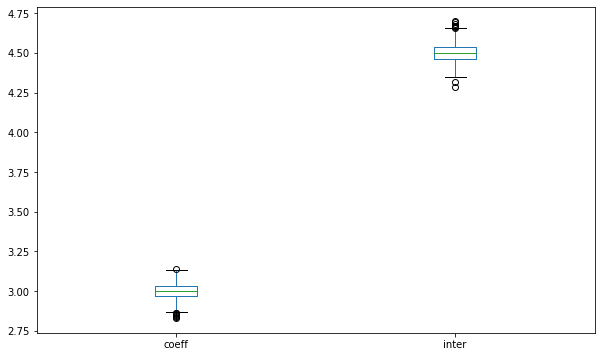

In [99]:
df.plot(kind="box",figsize=(10,6));

### Observese como cada una de las cajas son angostas, lo que da a enter que los datos en general están cercanos a la media, y a su vez la existencia de puntos outliers o valores atipicos o que están por fuera de la distribicón normal.